In [493]:
file = open("bmci.aspx", "rt") 
bmci = file.read()         
file.close()

file = open("boa.aspx", "rt") 
boa = file.read()         
file.close()    

file = open("tijari.aspx", "rt") 
tijari = file.read()         
file.close()    

file = open("cih.aspx", "rt") 
cih = file.read()         
file.close()    

file = open("bcp.aspx", "rt") 
bcp = file.read()         
file.close()  

In [494]:
from bs4 import BeautifulSoup

bmci = BeautifulSoup(bmci)
boa = BeautifulSoup(boa)
tijari = BeautifulSoup(tijari)
cih = BeautifulSoup(cih)
bcp = BeautifulSoup(bcp)

In [495]:
#bcp.find_all("span")

In [496]:
print(bcp.find_all("span")[144].get_text())

08/12/2022


In [497]:
max_len = len(bcp.find_all("span"))
max_len

1530

In [498]:
bcp_lst = []
boa_lst = []
tijari_lst = []
cih_lst = []
bmci_lst = []
for i in range(0,max_len,6):
       bcp_lst.append([bcp.find_all("span")[i].get_text(),
                       float(bcp.find_all("span")[i+1].get_text().replace(',','.')),
                       float(bcp.find_all("span")[i+2].get_text().replace(',','.')),
                       float(bcp.find_all("span")[i+3].get_text().replace(',','.')),
                       float(bcp.find_all("span")[i+4].get_text().replace(',','.')),
                       float(bcp.find_all("span")[i+5].get_text().replace(',','.'))])

bcp_lst

[['12/01/2023', 215.0, 215.0, 4.88, 16859.0, 3553199.85],
 ['10/01/2023', 205.0, 205.0, 4.03, 24880.0, 5058099.5],
 ['09/01/2023', 197.05, 197.05, 1.26, 18577.0, 3689281.55],
 ['06/01/2023', 194.6, 194.6, -5.99, 74525.0, 14511149.8],
 ['05/01/2023', 207.0, 207.0, -5.91, 12245.0, 2618064.0],
 ['04/01/2023', 220.0, 220.0, -2.18, 36954.0, 8192001.1],
 ['03/01/2023', 224.9, 224.9, -0.93, 7149.0, 1608327.15],
 ['02/01/2023', 227.0, 227.0, -1.73, 16368.0, 3715551.5],
 ['30/12/2022', 231.0, 231.0, -3.35, 293330.0, 67770083.0],
 ['29/12/2022', 239.0, 239.0, 1.7, 204557.0, 48866338.0],
 ['28/12/2022', 235.0, 235.0, 2.17, 132011.0, 31216890.0],
 ['27/12/2022', 230.0, 230.0, -2.09, 131088.0, 30176370.05],
 ['26/12/2022', 234.9, 234.9, 1.69, 124225.0, 29180452.5],
 ['23/12/2022', 231.0, 231.0, -0.43, 109840.0, 25412830.0],
 ['22/12/2022', 232.0, 232.0, -0.43, 128203.0, 29607867.8],
 ['21/12/2022', 233.0, 233.0, 2.64, 66243.0, 15283121.5],
 ['20/12/2022', 227.0, 227.0, -1.3, 11533.0, 2622345.9],
 [

In [499]:
import csv 

In [500]:
cols= ['date','closing','adjusted','evolution','quantity','volume']
with open('bcp_csv.csv', 'w') as f: 
    csv_writer = csv.writer(f)
    csv_writer.writerow(cols)
    csv_writer.writerows(bcp_lst)
    

In [501]:
import csv 
from bs4 import BeautifulSoup

def aspx_to_csv(name_aspx):
    file = open(name_aspx, "rt") 
    read_file = file.read()         
    file.close()
    
    file_soup = BeautifulSoup(read_file)
    
    max_len = len(file_soup.find_all("span"))
    lst = []
    for i in range(0,max_len,6):
           lst.append([bcp.find_all("span")[i].get_text(),
                       float(file_soup.find_all("span")[i+1].get_text().replace(',','.')),
                       float(file_soup.find_all("span")[i+2].get_text().replace(',','.')),
                       float(file_soup.find_all("span")[i+3].get_text().replace(',','.')),
                       float(file_soup.find_all("span")[i+4].get_text().replace(',','.')),
                       float(file_soup.find_all("span")[i+5].get_text().replace(',','.'))])
    
    
    cols= ['date','closing','adjusted','evolution','quantity','volume']
    name = name_aspx.replace('.aspx','')
    with open(name+'_csv.csv', 'w') as f: 
        csv_writer = csv.writer(f)
        csv_writer.writerow(cols)
        csv_writer.writerows(lst)
            

In [502]:
name = "bmci.aspx"
aspx_to_csv(name)

In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Stock:
 
    def __init__(self,name):
        self.name = name
        aspx_to_csv(name+".aspx")
        self.data = pd.read_csv(name+'_csv.csv')
        
    def graph(self,m,nsma):
        
        ''' this an instance method that graphs volumes in bars and value'''
        
        fig, ax1 = plt.subplots(figsize=(8, 8))
        ax2 = ax1.twinx()
        ax1.bar(self.data.index,self.data['volume'],color='orange',label='volume')
        ax2.plot(self.data.index,self.data["adjusted"],color='blue',label='value')
        ax1.grid(zorder=0)

        plt.plot(stock.momentum(m),color='red',label='Momentum')
        plt.plot(stock.sma(nsma),color='green',label='Moving Average')
        plt.legend()
        plt.show()
        
    def maximumValue(self):
        return self.data['adjusted'].max()
    
    def minimumValue(self):
        return self.data['adjusted'].max()
    
    def maximumVolume(self):
        return self.data['volume'].max()
    
    def maximumQuantity(self):
        return self.data['quantity'].max()
  
    def momentum(self,N):
        length = len(self.data)
        if type(N) is list:
            lst = []
            for j in range(len(N)):
                m = []
                for i in range(0,length):
                    if i < N[j]:
                        continue
                    else:
                        m.append(self.data['closing'][i] - self.data['closing'][i-N[j]])
                
                lst.append(m)
            df = pd.DataFrame (lst)
            return lst
        
        else:
            m= []
            for i in range(0,length):
                if i < N:
                    continue
                else:
                    m.append(self.data['closing'][i] - self.data['closing'][i-N])
            df = pd.DataFrame (m, columns = [N])
            return df
        
    def sma(self,N): 
        windows = self.data['closing'].rolling(N)

        ma = windows.mean()

        malst = ma.tolist()
        lst = malst[N - 1:]
            
        return lst   
        
stock = Stock("tijari")
stock.data.head(6)

,date,closing,adjusted,evolution,quantity,volume
0,12/01/2023,392.0,392.0,-0.76,72489.0,28422303.05
1,10/01/2023,395.0,395.0,-0.50,35947.0,14191684.25
2,09/01/2023,397.0,397.0,0.00,2336.0,922850.65
3,06/01/2023,397.0,397.0,-0.75,27378.0,10753859.50
4,05/01/2023,400.0,400.0,0.00,162.0,64800.00
5,04/01/2023,400.0,400.0,1.27,32088.0,12785191.60


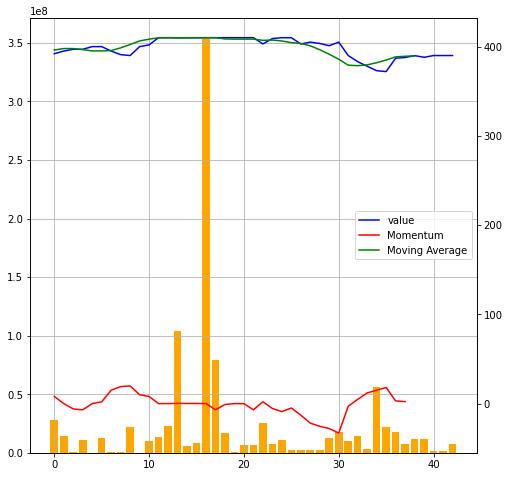

In [509]:
stock.graph(5,5)

In [510]:
print('Maximum Value :',stock.maximumValue())
print('Maximum Value :',stock.minimumValue())
print('Maximum Volume :',stock.maximumVolume())
print('Maximum Quantity :',stock.maximumQuantity())

Maximum Value : 410.0
Maximum Value : 410.0
Maximum Volume : 353604135.45
Maximum Quantity : 862558.0


In [511]:
stock.momentum(3).head(5)

,3
0,5.0
1,5.0
2,3.0
3,-2.0
4,-9.0


In [512]:
stock.sma(30)

[403.76500000000004,
 404.1983333333334,
 404.0316666666667,
 403.5683333333333,
 402.935,
 402.03499999999997,
 401.10166666666663,
 400.835,
 400.72833333333335,
 400.72666666666663,
 400.32666666666665,
 399.9283333333333,
 399.2616666666666,
 398.59499999999997]